In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

In [2]:
DATA_DIR = '../dataset'

# History

In [3]:
df_history = pd.read_csv(os.path.join(DATA_DIR, 'history_data.csv'))

In [4]:
print(df_history.shape)

(1005651, 8)


In [5]:
df_history.head(10)

,profile_id,ss_id,log_time,act_target_dtl,album_id,payment,continuous_play,short_trailer
0,3,20220301115653,20220301115719,MKID003,15,NaN,Y,N
1,3,20220301115653,20220301115809,MKID003,16,NaN,Y,N
2,3,20220301115653,20220301115958,MKID003,17,NaN,Y,N
3,3,20220301115653,20220301120118,MKID003,18,NaN,Y,N
4,3,20220301115653,20220301120229,MKID003,19,NaN,Y,N
5,3,20220301115653,20220301120450,MKID003,20,NaN,Y,N
6,3,20220301115653,20220301120654,MKID003,21,NaN,Y,N
7,3,20220301115653,20220301120859,MKID003,22,NaN,Y,N
8,3,20220301115653,20220301121104,MKID003,23,NaN,Y,N
9,3,20220301115653,20220301121308,MKID003,24,NaN,Y,N


In [6]:
df_history['continuous_play'] = np.where(df_history['continuous_play']=='Y', 1, 0)
df_history['short_trailer'] = np.where(df_history['short_trailer']=='Y', 1, 0)

In [7]:
df_history['ss_continuous_cnt'] = df_history.groupby(['profile_id', 'ss_id'])['continuous_play'].transform('cumsum')

- 세션 내 연속재생 시청 영상 합계

In [8]:
df_history.head(10)

,profile_id,ss_id,log_time,act_target_dtl,album_id,payment,continuous_play,short_trailer,ss_continuous_cnt
0,3,20220301115653,20220301115719,MKID003,15,NaN,1,0,1
1,3,20220301115653,20220301115809,MKID003,16,NaN,1,0,2
2,3,20220301115653,20220301115958,MKID003,17,NaN,1,0,3
3,3,20220301115653,20220301120118,MKID003,18,NaN,1,0,4
4,3,20220301115653,20220301120229,MKID003,19,NaN,1,0,5
5,3,20220301115653,20220301120450,MKID003,20,NaN,1,0,6
6,3,20220301115653,20220301120654,MKID003,21,NaN,1,0,7
7,3,20220301115653,20220301120859,MKID003,22,NaN,1,0,8
8,3,20220301115653,20220301121104,MKID003,23,NaN,1,0,9
9,3,20220301115653,20220301121308,MKID003,24,NaN,1,0,10


In [9]:
print(f"Profile Nuniuqe Count: {df_history['profile_id'].nunique()}")
print(f"Album Nuniuqe Count: {df_history['album_id'].nunique()}")

Profile Nuniuqe Count: 8311
Album Nuniuqe Count: 20695


In [82]:
df_history.shape

(1005651, 9)

In [85]:
df_history.query('ss_id>log_time')

,profile_id,ss_id,log_time,act_target_dtl,album_id,payment,continuous_play,short_trailer,ss_continuous_cnt
2974,30,20220305130048,20220305130034,MKID003,1900,NaN,0,0,0
2980,30,20220313103474,20220313103422,MKID003,1420,500.0,0,0,0
2995,30,20220408201889,20220408201874,MKID003,1910,NaN,0,0,0
3280,59,20220303183951,20220303183920,MKID003,2141,NaN,0,0,0
3281,59,20220303183951,20220303183920,MKID003,2141,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...
1005577,33032,20220427110951,20220427110923,MKID003,609,NaN,0,0,0
1005625,33032,20220427145664,20220427145634,MKID003,65,NaN,0,0,0
1005627,33032,20220427145841,20220427145826,MKID003,381,NaN,0,0,0
1005631,33032,20220427150199,20220427150172,MKID003,125,NaN,1,0,1


- 세션이 시작된 시간보다 로그 시간이 빠른 경우가 존재

In [ ]:
df

# Watch

In [11]:
df_watch = pd.read_csv(os.path.join(DATA_DIR, 'watch_e_data.csv'))

In [12]:
print(f"Profile Nuniuqe Count: {df_watch['profile_id'].nunique()}")
print(f"Album Nuniuqe Count: {df_watch['album_id'].nunique()}")

Profile Nuniuqe Count: 7658
Album Nuniuqe Count: 20361


In [13]:
df_watch['watch_ratio'] = df_watch['watch_time'] / df_watch['total_time']

- 컨텐츠 길이 대비 시청 시간 비율을 계산

In [14]:
df_watch.query('watch_ratio<0.1')

,profile_id,ss_id,log_time,act_target_dtl,album_id,watch_time,total_time,continuous_play,watch_ratio
19,3,20220301115653,20220301123428,MKID049,21,9,119,0,0.075630
20,5,20220302203651,20220302203824,MKID049,65,30,536,0,0.055970
21,5,20220302213852,20220302214208,MKID049,66,18,412,0,0.043689
31,5,20220306110942,20220306111532,MKID049,75,19,301,0,0.063123
51,5,20220306142351,20220306142859,MKID049,92,4,1207,2,0.003314
...,...,...,...,...,...,...,...,...,...
892780,33032,20220427155091,20220427155153,MKID049,3128,2,67,0,0.029851
892781,33032,20220427155091,20220427155385,MKID049,393,81,1036,0,0.078185
892786,33032,20220427155091,20220427155603,MKID049,125,6,520,0,0.011538
892791,33032,20220427155839,20220427155826,MKID049,125,10,520,0,0.019231


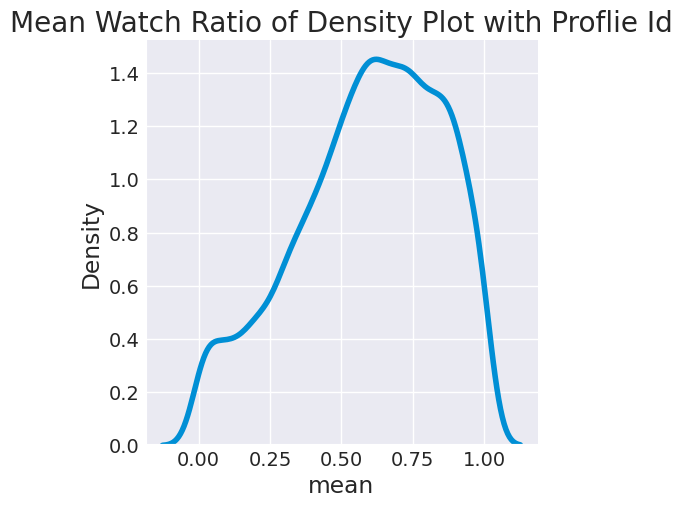

In [15]:
(df_watch
 .groupby('profile_id')['watch_ratio']
 .agg(['mean']) 
 .pipe((sns.displot, 'data'),
       x='mean',
       kind='kde'
      )
)

plt.title('Mean Watch Ratio of Density Plot with Proflie Id')
plt.show()

In [16]:
df_watch.query("ss_id==20220301115653 and album_id==20")

,profile_id,ss_id,log_time,act_target_dtl,album_id,watch_time,total_time,continuous_play,watch_ratio
5,3,20220301115653,20220301120650,MKID049,20,119,119,1,1.0
18,3,20220301115653,20220301123408,MKID049,20,119,119,1,1.0


- 세션 내 다시 시청하는 경우도 존재하고 있음

In [17]:
df_watch['ss_watch_cnt'] = df_watch.groupby(['profile_id', 'ss_id', 'album_id'])['act_target_dtl'].transform('cumcount') + 1

In [18]:
df_watch.query("ss_id==20220301115653 and album_id==20")

,profile_id,ss_id,log_time,act_target_dtl,album_id,watch_time,total_time,continuous_play,watch_ratio,ss_watch_cnt
5,3,20220301115653,20220301120650,MKID049,20,119,119,1,1.0,1
18,3,20220301115653,20220301123408,MKID049,20,119,119,1,1.0,2


- 세션 내 다시 시청하는 경우 구분을 위해 변수 추가 

In [19]:
df_watch['ss_watch_cnt'].describe()

count    892794.000000
mean          3.365358
std          14.927284
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         570.000000
Name: ss_watch_cnt, dtype: float64

In [20]:
df_watch.query('ss_watch_cnt==569')

,profile_id,ss_id,log_time,act_target_dtl,album_id,watch_time,total_time,continuous_play,watch_ratio,ss_watch_cnt
150950,3847,20220302103634,20220302131976,MKID049,15642,16,4261,0,0.003755,569


In [21]:
df_watch.query('profile_id==3847 and ss_id==20220302103634 and album_id==15642').tail(10)

,profile_id,ss_id,log_time,act_target_dtl,album_id,watch_time,total_time,continuous_play,watch_ratio,ss_watch_cnt
150942,3847,20220302103634,20220302131946,MKID049,15642,16,4267,0,0.003750,561
150943,3847,20220302103634,20220302131946,MKID049,15642,16,4267,0,0.003750,562
150944,3847,20220302103634,20220302131946,MKID049,15642,16,4267,0,0.003750,563
150945,3847,20220302103634,20220302131946,MKID049,15642,16,4267,0,0.003750,564
150946,3847,20220302103634,20220302131976,MKID049,15642,16,4261,0,0.003755,565
150947,3847,20220302103634,20220302131976,MKID049,15642,16,4261,0,0.003755,566
150948,3847,20220302103634,20220302131976,MKID049,15642,16,4261,0,0.003755,567
150949,3847,20220302103634,20220302131976,MKID049,15642,16,4261,0,0.003755,568
150950,3847,20220302103634,20220302131976,MKID049,15642,16,4261,0,0.003755,569
150951,3847,20220302103634,20220302131976,MKID049,15642,16,4261,0,0.003755,570


In [22]:
df_history.query('profile_id==3847 and ss_id==20220302103634')

,profile_id,ss_id,log_time,act_target_dtl,album_id,payment,continuous_play,short_trailer,ss_continuous_cnt
170663,3847,20220302103634,20220302104116,MKID003,10099,500.0,1,0,1
170664,3847,20220302103634,20220302104116,MKID003,10099,500.0,1,0,2
170665,3847,20220302103634,20220302104116,MKID003,10099,500.0,1,0,3
170666,3847,20220302103634,20220302104116,MKID003,10099,500.0,1,0,4
170667,3847,20220302103634,20220302104116,MKID003,10099,500.0,1,0,5
...,...,...,...,...,...,...,...,...,...
171447,3847,20220302103634,20220302160697,MKID003,10099,500.0,0,0,729
171448,3847,20220302103634,20220302160697,MKID003,10099,500.0,0,0,729
171449,3847,20220302103634,20220302160877,MKID003,10099,500.0,0,0,729
171450,3847,20220302103634,20220302160877,MKID003,10099,500.0,0,0,729


- history에서 subset을 기준으로 중복 데이터 제거가 필요해 보임

# Seen

In [23]:
df_watch_real = df_watch.query('watch_ratio>=0.1').reset_index(drop=True)

In [24]:
df_seen = pd.merge(df_history.drop('log_time', axis=1),
                   df_watch_real.drop('log_time', axis=1),
                   how='inner',
                   on=['profile_id', 'ss_id', 'album_id'])

In [25]:
df_seen.shape

(3198350, 14)

In [86]:
df_history.head(20)

,profile_id,ss_id,log_time,act_target_dtl,album_id,payment,continuous_play,short_trailer,ss_continuous_cnt
0,3,20220301115653,20220301115719,MKID003,15,NaN,1,0,1
1,3,20220301115653,20220301115809,MKID003,16,NaN,1,0,2
2,3,20220301115653,20220301115958,MKID003,17,NaN,1,0,3
3,3,20220301115653,20220301120118,MKID003,18,NaN,1,0,4
4,3,20220301115653,20220301120229,MKID003,19,NaN,1,0,5
5,3,20220301115653,20220301120450,MKID003,20,NaN,1,0,6
6,3,20220301115653,20220301120654,MKID003,21,NaN,1,0,7
7,3,20220301115653,20220301120859,MKID003,22,NaN,1,0,8
8,3,20220301115653,20220301121104,MKID003,23,NaN,1,0,9
9,3,20220301115653,20220301121308,MKID003,24,NaN,1,0,10


In [87]:
df_watch.head(20)

,profile_id,ss_id,log_time,act_target_dtl,album_id,watch_time,total_time,continuous_play,watch_ratio,ss_watch_cnt
0,3,20220301115653,20220301115805,MKID049,15,46,46,1,1.000000,1
1,3,20220301115653,20220301115954,MKID049,16,104,105,1,0.990476,1
2,3,20220301115653,20220301120114,MKID049,17,76,76,1,1.000000,1
3,3,20220301115653,20220301120226,MKID049,18,67,68,1,0.985294,1
4,3,20220301115653,20220301120400,MKID049,19,90,90,0,1.000000,1
5,3,20220301115653,20220301120650,MKID049,20,119,119,1,1.000000,1
6,3,20220301115653,20220301120854,MKID049,21,119,119,1,1.000000,1
7,3,20220301115653,20220301121059,MKID049,22,119,119,1,1.000000,1
8,3,20220301115653,20220301121304,MKID049,23,120,121,1,0.991736,1
9,3,20220301115653,20220301121508,MKID049,24,119,119,1,1.000000,1


In [26]:
df_seen.head(30)

,profile_id,ss_id,act_target_dtl_x,album_id,payment,continuous_play_x,short_trailer,ss_continuous_cnt,act_target_dtl_y,watch_time,total_time,continuous_play_y,watch_ratio,ss_watch_cnt
0,3,20220301115653,MKID003,15,NaN,1,0,1,MKID049,46,46,1,1.000000,1
1,3,20220301115653,MKID003,16,NaN,1,0,2,MKID049,104,105,1,0.990476,1
2,3,20220301115653,MKID003,17,NaN,1,0,3,MKID049,76,76,1,1.000000,1
3,3,20220301115653,MKID003,18,NaN,1,0,4,MKID049,67,68,1,0.985294,1
4,3,20220301115653,MKID003,19,NaN,1,0,5,MKID049,90,90,0,1.000000,1
5,3,20220301115653,MKID003,20,NaN,1,0,6,MKID049,119,119,1,1.000000,1
6,3,20220301115653,MKID003,20,NaN,1,0,6,MKID049,119,119,1,1.000000,2
7,3,20220301115653,MKID003,20,NaN,1,0,19,MKID049,119,119,1,1.000000,1
8,3,20220301115653,MKID003,20,NaN,1,0,19,MKID049,119,119,1,1.000000,2
9,3,20220301115653,MKID003,21,NaN,1,0,7,MKID049,119,119,1,1.000000,1


- 연속 재생은 중복된 album이 또 나오는 경우도 존재, 이는 단순히 이전의 기록에 기반하여 추천이 이루어지는 것이 아니라 아이템 그 자체와 유사한 album으로 추천되는 형태인듯

In [27]:
df_history.query('profile_id==5').head(10)

,profile_id,ss_id,log_time,act_target_dtl,album_id,payment,continuous_play,short_trailer,ss_continuous_cnt
21,5,20220302203651,20220302203754,MKID003,65,NaN,1,0,1
22,5,20220302213852,20220302214150,MKID003,66,NaN,1,0,1
23,5,20220302215129,20220302215303,MKID003,67,NaN,1,0,1
24,5,20220302215129,20220302215329,MKID003,68,NaN,1,0,2
25,5,20220302215129,20220304160953,MKID003,65,NaN,1,0,3
26,5,20220302215129,20220304181254,MKID003,67,NaN,1,0,4
27,5,20220302215129,20220304181411,MKID003,69,NaN,1,0,5
28,5,20220302215129,20220304182521,MKID003,70,NaN,1,0,6
29,5,20220302215129,20220304183649,MKID003,71,NaN,1,0,7
30,5,20220302215129,20220304183804,MKID003,72,NaN,1,0,8


In [28]:
df_watch.query('profile_id==5').head(10)

,profile_id,ss_id,log_time,act_target_dtl,album_id,watch_time,total_time,continuous_play,watch_ratio,ss_watch_cnt
20,5,20220302203651,20220302203824,MKID049,65,30,536,0,0.055970,1
21,5,20220302213852,20220302214208,MKID049,66,18,412,0,0.043689,1
22,5,20220302215129,20220302215322,MKID049,67,18,93,0,0.193548,1
23,5,20220302215129,20220302215345,MKID049,68,16,51,0,0.313725,1
24,5,20220302215129,20220304181215,MKID049,65,242,536,0,0.451493,1
25,5,20220302215129,20220304181408,MKID049,67,73,92,1,0.793478,2
26,5,20220302215129,20220304182517,MKID049,69,665,665,1,1.000000,1
27,5,20220302215129,20220304183644,MKID049,70,665,665,1,1.000000,1
28,5,20220302215129,20220304183800,MKID049,71,71,71,1,1.000000,1
29,5,20220302215129,20220304183913,MKID049,72,69,71,1,0.971831,1


- 연속 재생 여부는 완전히 매칭되지 않음

## Recsys Based Watch

In [51]:
re_watch = (df_seen
            .drop_duplicates(subset=['profile_id', 'ss_id', 'album_id'], 
                             keep='last')
            .groupby(['profile_id', 'album_id'])['ss_watch_cnt'].sum()
            .reset_index(name='profile_watch_sum')
           )

In [52]:
re_watch.head(20)

,profile_id,album_id,profile_watch_sum
0,3,15,1
1,3,16,1
2,3,17,1
3,3,18,1
4,3,19,1
5,3,20,2
6,3,21,1
7,3,22,1
8,3,23,1
9,3,24,1


In [91]:
re_watch.groupby('profile_id').size().values

array([ 18, 243,   2, ...,   1,   2,  26])

<BarContainer object of 100 artists>

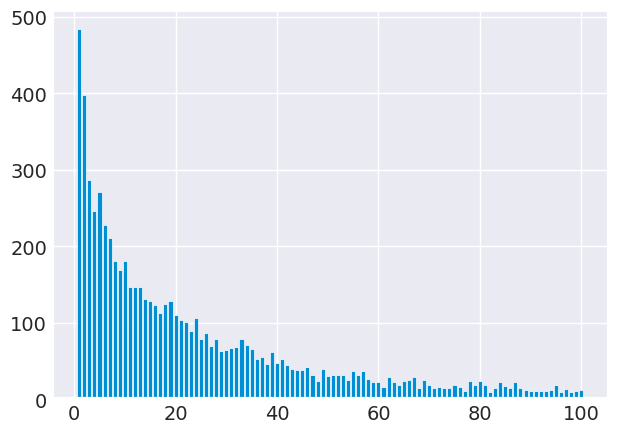

In [74]:
from collections import Counter

w = Counter(re_watch.groupby('profile_id').size().values)
w = sorted(w.items(), key=lambda x: x[0])

sample_w = dict(w[:100])

plt.bar(sample_w.keys(), sample_w.values())
plt.show()

In [78]:
sum(sample_w.values())

6734

In [31]:
df_watch.query('profile_id==5 and album_id==15')

,profile_id,ss_id,log_time,act_target_dtl,album_id,watch_time,total_time,continuous_play,watch_ratio,ss_watch_cnt
295,5,20220324213148,20220324213556,MKID049,15,46,46,1,1.00000,1
332,5,20220326105444,20220326110935,MKID049,15,23,46,0,0.50000,1
333,5,20220326133022,20220326133135,MKID049,15,47,47,1,1.00000,1
338,5,20220326133022,20220326133845,MKID049,15,46,46,1,1.00000,2
343,5,20220326133022,20220326134513,MKID049,15,6,47,0,0.12766,3
349,5,20220326133022,20220326135457,MKID049,15,46,46,1,1.00000,4


In [32]:
pred = (re_watch
         .groupby('profile_id')[['profile_watch_sum', 'album_id']].apply(lambda x: x.nlargest(25, columns=['profile_watch_sum']))
         .reset_index()
         .groupby('profile_id')['album_id'].apply(list)
         .reset_index(name='predicted_list')
       )

In [33]:
pred.head(10)

,profile_id,predicted_list
0,3,"[20, 15, 25, 31, 30, 29, 28, 27, 26, 24, 16, 2..."
1,5,"[84, 128, 314, 317, 86, 74, 75, 15, 72, 73, 90..."
2,7,"[237, 343]"
3,19,[403]
4,20,"[442, 478, 491, 426, 471, 479, 430, 356, 476, ..."
5,22,"[593, 799, 835, 302, 291, 1002, 655, 1000, 16,..."
6,24,[1869]
7,27,"[124, 50, 801, 1886, 1884, 1883, 1882, 1881, 1..."
8,30,"[1915, 1919, 150, 225, 232, 1916, 1917, 1918, ..."
9,31,"[1949, 1944, 1946, 1950, 1951, 1953, 1930, 193..."


In [88]:
pred['profile_id'].nunique()

7411

# Profile

In [34]:
df_profile = pd.read_csv(os.path.join(DATA_DIR, 'profile_data.csv'))

In [35]:
df_profile['profile_id'].nunique()

8311

In [36]:
df_profile.head()

,profile_id,sex,age,pr_interest_keyword_cd_1,pr_interest_keyword_cd_2,pr_interest_keyword_cd_3,ch_interest_keyword_cd_1,ch_interest_keyword_cd_2,ch_interest_keyword_cd_3
0,3,F,5,P02,P04,P07,K01,K03,K04
1,5,M,5,P07,P08,P06,K05,K08,K09
2,7,F,9,P05,P03,NaN,K06,K04,NaN
3,12,M,6,P03,P06,P02,K09,K07,K03
4,16,F,12,P03,P06,P01,K01,K06,K04


In [37]:
rec_profile = (df_seen
               .drop_duplicates(subset=['profile_id', 'ss_id', 'album_id'], 
                                keep='last')
               .merge(df_profile[['profile_id', 'sex', 'age']], 
                      how='left',
                      on=['profile_id'])
              )

In [38]:
rec_profile.head()

,profile_id,ss_id,act_target_dtl_x,album_id,payment,continuous_play_x,short_trailer,ss_continuous_cnt,act_target_dtl_y,watch_time,total_time,continuous_play_y,watch_ratio,ss_watch_cnt,sex,age
0,3,20220301115653,MKID003,15,NaN,1,0,1,MKID049,46,46,1,1.000000,1,F,5
1,3,20220301115653,MKID003,16,NaN,1,0,2,MKID049,104,105,1,0.990476,1,F,5
2,3,20220301115653,MKID003,17,NaN,1,0,3,MKID049,76,76,1,1.000000,1,F,5
3,3,20220301115653,MKID003,18,NaN,1,0,4,MKID049,67,68,1,0.985294,1,F,5
4,3,20220301115653,MKID003,19,NaN,1,0,5,MKID049,90,90,0,1.000000,1,F,5


In [39]:
group_rec = (rec_profile
             .groupby(['sex', 'age', 'album_id'])['ss_watch_cnt'].sum()
             .reset_index(name='group_watch_sum')
             .groupby(['sex', 'age'])[['group_watch_sum', 'album_id']].apply(lambda x: x.nlargest(25, columns=['group_watch_sum']))
             .reset_index()
             .groupby(['sex','age'])['album_id'].apply(list)
             .reset_index(name='pred_list')
            )

In [89]:
group_rec

,sex,age,pred_list
0,F,1,"[16, 15, 67, 18, 224, 17, 241, 38, 19, 178, 41..."
1,F,2,"[3502, 16, 19, 1047, 3501, 2641, 17, 18, 1211,..."
2,F,3,"[16, 19, 15, 224, 17, 18, 38, 406, 67, 410, 22..."
3,F,4,"[6684, 16, 15, 124, 38, 19, 188, 241, 3283, 37..."
4,F,5,"[124, 125, 65, 190, 339, 188, 329, 16, 15, 126..."
5,F,6,"[124, 125, 65, 190, 339, 1880, 127, 241, 329, ..."
6,F,7,"[125, 124, 65, 339, 1880, 329, 190, 241, 127, ..."
7,F,8,"[1880, 125, 16, 124, 347, 241, 65, 339, 190, 1..."
8,F,9,"[125, 65, 124, 241, 127, 2472, 190, 347, 339, ..."
9,F,10,"[125, 55, 124, 190, 241, 339, 65, 2502, 1880, ..."


# Submission

In [41]:
sub = pd.read_csv(os.path.join(DATA_DIR, 'sample_submission.csv'), usecols=['profile_id'])

In [42]:
sub = sub.merge(df_profile[['profile_id', 'sex', 'age']], 
                how='left',
                on=['profile_id'])

In [43]:
sub = sub.merge(pred, how='left', on=['profile_id'])
sub['predicted_list'] = sub['predicted_list'].apply(lambda d: d if isinstance(d, list) else [])

In [44]:
sub = sub.merge(group_rec, how='left', on=['sex', 'age'])

In [45]:
sub.head()

,profile_id,sex,age,predicted_list,pred_list
0,3,F,5,"[20, 15, 25, 31, 30, 29, 28, 27, 26, 24, 16, 2...","[124, 125, 65, 190, 339, 188, 329, 16, 15, 126..."
1,5,M,5,"[84, 128, 314, 317, 86, 74, 75, 15, 72, 73, 90...","[16, 124, 15, 125, 19, 65, 339, 18, 17, 38, 24..."
2,7,F,9,"[237, 343]","[125, 65, 124, 241, 127, 2472, 190, 347, 339, ..."
3,12,M,6,[],"[124, 19, 16, 65, 126, 125, 424, 18, 339, 190,..."
4,16,F,12,[],"[38, 39, 225, 136, 230, 40, 41, 42, 43, 44, 45..."


In [46]:
sub['a'] = sub['predicted_list'] + sub['pred_list']

In [47]:
sub['a'] = sub['a'].map(lambda x: x[:25])

In [48]:
sub[['profile_id', 'a']].rename(columns={'a':'predicted_list'}).to_csv('baseline3.csv', index=False, encoding='utf-8-sig')

	0.2098	0.2108	0.2070